### **Uczenie Maszynowe, Laboratoria 9 - Programowanie Dynamiczne**
### - Iteracja Polityki, Iteracja Funkcji Wartości



---


*Aut. skryptu: Agnieszka Łysak, 17.05.2021*

*   Wzór nr 1: Iteracyjne Równanie Bellmana (dla funkcji V):
 - potrzebne do algorytmu Ewaluacji Polityki (Policy Evaluation)







$$ v(s)_\pi =  \sum \limits _{a} \pi(a|s) \sum \limits _{s'} \sum \limits _{r} p(s',r|s,a) [r+\gamma v_\pi(s')]$$

$$↓$$

$$ v(s)_{k+1} =  \sum \limits _{a} \pi(a|s) \sum \limits _{s'} \sum \limits _{r} p(s',r|s,a) [r+\gamma v_k(s')]$$

*   Wzór nr 2: Obliczanie Delty (różnicy w zmianie wartości v):

$$ \Delta = max_a |v_{k+1}(s) - v_k(s) | $$

*   Wzór nr 3: Równanie Bellmana (dla funkcji Q):
 - potrzebne do algorytmu Iteracji Polityki (Policy Teration) i Iteracji Funkcji Wartości (Value Iteration)

$$ q_\pi(s,a) =  \sum \limits _{s'} \sum \limits _{r}p(s',r|s,a)[r+\gamma*v_\pi(s')]$$

*   Wzór nr 4: Równanie Optymalności Bellmana:
 - potrzebne do algorytmu Iteracji Funkcji Wartości (Value Iteration)


$$ v(s)_ =  \max \limits _{a} \sum \limits _{s'} \sum \limits _{r} p(s',r|s,a) [r+\gamma v(s')]$$

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import gym

env = gym.make("FrozenLake-v0", is_slippery=True).env
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [41]:
env.action_space

Discrete(4)

In [42]:
env.observation_space

Discrete(16)

In [43]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [44]:
states = list(range(env.observation_space.n))
actions = list(range(env.action_space.n))

### 1. Inicjacja Polityki:

In [45]:
def initialize_policy(n_states, n_actions):
  
    policy = np.zeros(shape=(n_states, n_actions)) +  1/n_actions
    
    return policy

policy = initialize_policy(n_states, n_actions)

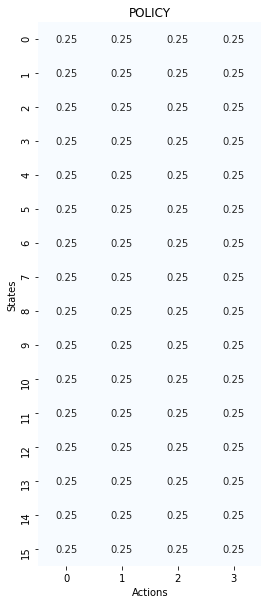

In [46]:
plt.figure(figsize=(4, 10))
sns.heatmap(policy, cmap="Blues", annot=True, cbar=False)
plt.title("POLICY")
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()

In [47]:
env.P[0][1]

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False),
 (0.3333333333333333, 1, 0.0, False)]

### 2. Algorytm Ewaluacji Polityki (Policy Evaluation):

In [48]:
V = np.zeros(n_states)
pi = initialize_policy(n_states, n_actions)
gamma = 1
theta = 0.0001

In [49]:
def bellman_update(env, V, pi, s, gamma):
    v = 0.
    for a in actions:
        for p, s_, r, done in env.P[s][a]:
            v += pi[s][a] * p * (r + gamma * V[s_])
    V[s] = v

In [50]:
def evaluate_policy(env, V, pi, gamma, theta):
    delta = float('inf')
    while delta > theta:
        delta = 0
        for s in states:
            v = V[s]
            bellman_update(env, V, pi, s, gamma)
            delta = max(delta, abs(v - V[s]))
            
    return V

<function matplotlib.pyplot.show>

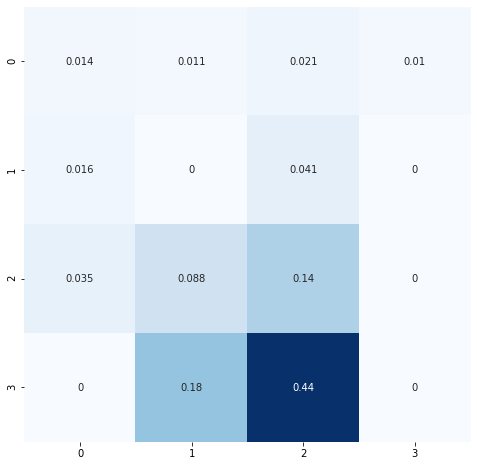

In [51]:
V_e = evaluate_policy(env, V, pi, gamma, theta)

plt.figure(figsize=(8, 8))
sns.heatmap(V.reshape(4, 4), cmap="Blues", annot=True, cbar=False)
plt.show

In [52]:
V

array([0.01362153, 0.01144634, 0.02081586, 0.01037763, 0.01609442,
       0.        , 0.04070908, 0.        , 0.03473223, 0.0881362 ,
       0.1420284 , 0.        , 0.        , 0.17579915, 0.43927396,
       0.        ])

### 4. Obliczanie funkcji wartości akcji (Q):

In [53]:
def q_value(env, V, gamma, s):
  q = np.zeros(n_actions)

  for a in actions:
    for p, s_, r, done in env.P[s][a]:
        q[a] += p * (r + (gamma * V[s_]))
  return q

In [54]:
Q = np.zeros([n_states, n_actions])

for s in states:
  Q[s] = q_value(env, V, gamma, s)

In [55]:
Q

array([[0.01444582, 0.01372076, 0.01372076, 0.01289647],
       [0.00835596, 0.01147913, 0.01075407, 0.01529458],
       [0.02432376, 0.02084435, 0.02396752, 0.01421328],
       [0.01039783, 0.01039783, 0.00691842, 0.01385704],
       [0.02148272, 0.01694221, 0.01611792, 0.00990532],
       [0.        , 0.        , 0.        , 0.        ],
       [0.05428142, 0.0473428 , 0.05428142, 0.00693862],
       [0.        , 0.        , 0.        , 0.        ],
       [0.01694221, 0.04095614, 0.03474354, 0.04632095],
       [0.07017713, 0.11751993, 0.10594252, 0.05892021],
       [0.18937308, 0.17580339, 0.15999435, 0.04294843],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.08797845, 0.20502437, 0.23440311, 0.17580339],
       [0.25236717, 0.53835771, 0.52710079, 0.43927585],
       [0.        , 0.        , 0.        , 0.        ]])

In [56]:
Q.shape

(16, 4)

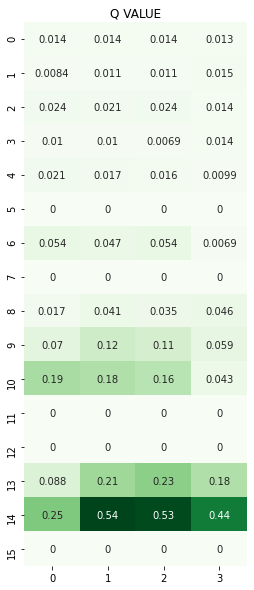

In [57]:
plt.figure(figsize=(4, 10))
sns.heatmap(Q, cmap="Greens", annot=True, cbar=False)
plt.title("Q VALUE")
plt.show()

In [58]:
env.P[14]

{0: [(0.3333333333333333, 10, 0.0, False),
  (0.3333333333333333, 13, 0.0, False),
  (0.3333333333333333, 14, 0.0, False)],
 1: [(0.3333333333333333, 13, 0.0, False),
  (0.3333333333333333, 14, 0.0, False),
  (0.3333333333333333, 15, 1.0, True)],
 2: [(0.3333333333333333, 14, 0.0, False),
  (0.3333333333333333, 15, 1.0, True),
  (0.3333333333333333, 10, 0.0, False)],
 3: [(0.3333333333333333, 15, 1.0, True),
  (0.3333333333333333, 10, 0.0, False),
  (0.3333333333333333, 13, 0.0, False)]}

In [59]:
env.render()


SFFF
FHFH
FFFH
HFFG


<function matplotlib.pyplot.show>

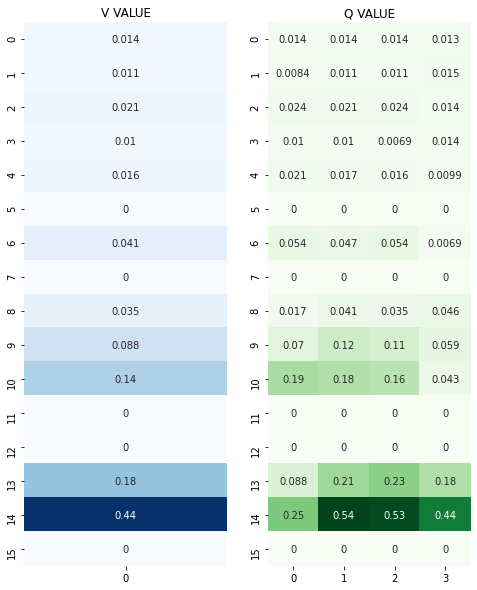

In [60]:
fig, ax = plt.subplots(1,2, figsize=(8, 10))
sns.heatmap(V.reshape(16, 1), cmap="Blues", annot=True, cbar=False, ax=ax[0])
ax[0].set_title('V VALUE')
sns.heatmap(Q, cmap="Greens", annot=True, cbar=False, ax=ax[1])
ax[1].set_title('Q VALUE')
plt.show

### 5. Algorytm Iteracji Polityki (Policy Iteration)

In [61]:
V = np.zeros(n_states)
Q = np.zeros([n_states, n_actions])
policy = initialize_policy(n_states, n_actions)
gamma = 1
theta = 0.0001

In [62]:
def policy_evaluation(env, policy, gamma, theta):
  V = np.zeros(n_states)
  delta = float('inf')

  while delta > theta:
        
      delta = 0
        
      for s in states:           
          v = 0
          for a, p_a in enumerate(policy[s]):
              for p, s_, r, done in env.P[s][a]: 
                  v += p_a * p * (r + gamma * V[s_])
                    
          delta = max(delta, abs(v - V[s]))
            
          V[s] = v
        
  return V

In [63]:
def q_function(env, V, s, gamma):
    q = np.zeros(n_actions)
         
    for a in actions:
        for p, s_, r, done in env.P[s][a]:
            q[a] += p * (r + gamma * V[s_])
    
    return q

In [64]:
def policy_improvement(env, V, gamma):

    policy = np.zeros([n_states, n_actions])   
    
    for s in states:
        
        q = q_function(env, V, s, gamma)        
        
        policy[s][np.argmax(q)] = 1
    
    return policy

In [65]:
def policy_iteration(env, gamma, theta):
    
    policy = initialize_policy(n_states, n_actions)
    
    while True:

        V = policy_evaluation(env, policy, gamma, theta)
        
        next_policy = policy_improvement(env, V, gamma)
        
        delta = policy - next_policy
        
        policy = next_policy
        
        if delta.all() < theta:
            break
    
    return policy, V

In [66]:
policy_pi, V_pi = policy_iteration(env, gamma, theta)

In [67]:
policy_pi

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [68]:
V_pi

array([0.77827429, 0.65672395, 0.53530858, 0.53518635, 0.77855224,
       0.        , 0.41397766, 0.        , 0.77898058, 0.77951717,
       0.70665339, 0.        , 0.        , 0.85297635, 0.92648056,
       0.        ])

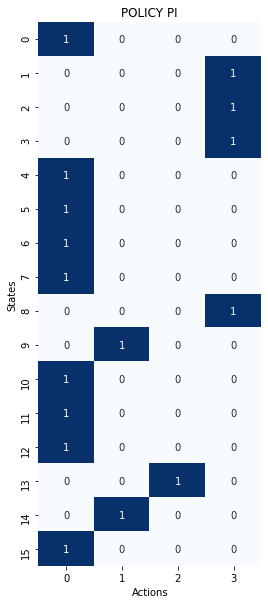

In [69]:
plt.figure(figsize=(4, 10))
sns.heatmap(policy_pi, cmap="Blues", annot=True, cbar=False)
plt.title("POLICY PI")
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()

<function matplotlib.pyplot.show>

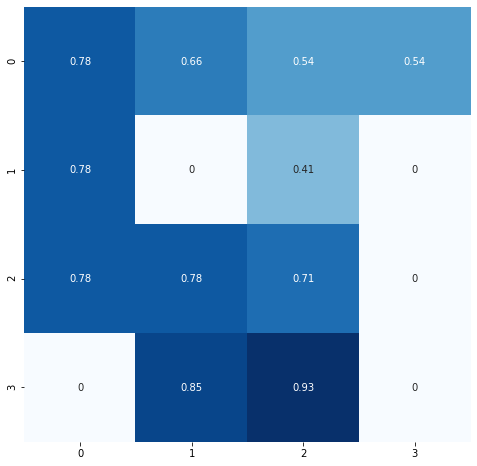

In [70]:
plt.figure(figsize=(8, 8))
sns.heatmap(V_pi.reshape(4, 4), cmap="Blues", annot=True, cbar=False)
plt.show

### 6. Algorytm Iteracji Funkcji Wartości (Value Iteration)

In [71]:
def value_iteration(env, gamma=1, theta=1e-8):

    V = np.zeros(n_states)
    
    while True:
        
        delta = 0    
       
        for s in states:
                     
            v = V[s]
            
            q = q_function(env, V, s, gamma)
            
            V[s] = max(q)
            
            delta = max(delta, abs(V[s] - v))    

        if delta < theta:
            break
            
    policy = policy_improvement(env, V, gamma)   
    
    return policy, V

In [72]:
policy_vi, V_vi = value_iteration(env, gamma, theta)

In [73]:
policy_vi

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [74]:
V_vi

array([0.82182145, 0.82126109, 0.82087163, 0.82067347, 0.82199325,
       0.        , 0.52824715, 0.        , 0.82226231, 0.82260733,
       0.76389785, 0.        , 0.        , 0.88171208, 0.94085038,
       0.        ])

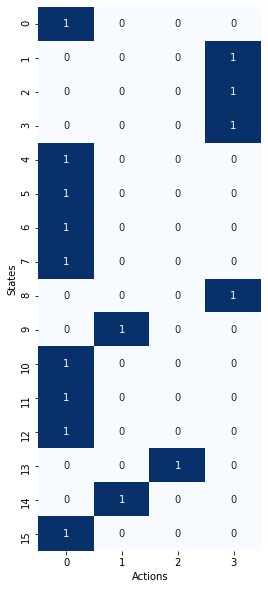

In [75]:
plt.figure(figsize=(4, 10))
sns.heatmap(policy_vi, cmap="Blues", annot=True, cbar=False)
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()

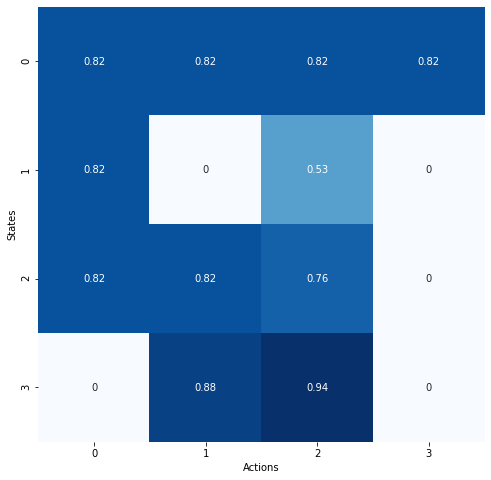

In [76]:
plt.figure(figsize=(8, 8))
sns.heatmap(V_vi.reshape(4, 4), cmap="Blues", annot=True, cbar=False)
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()

<function matplotlib.pyplot.show>

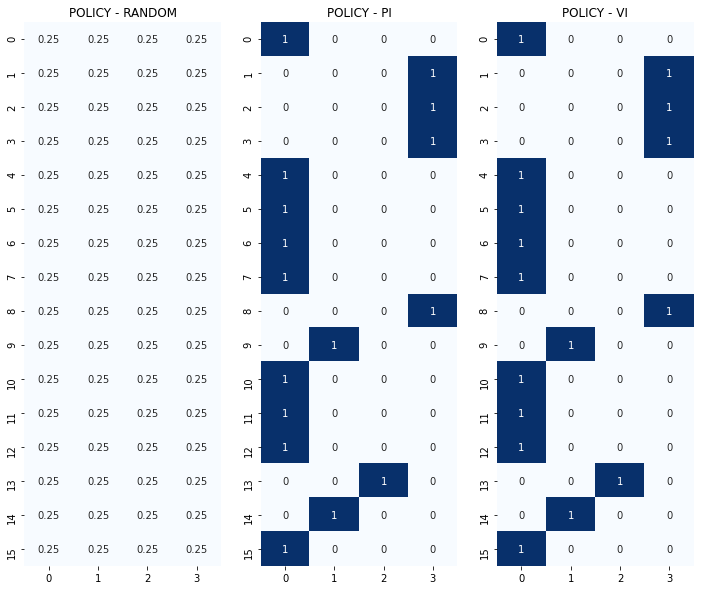

In [77]:
fig, ax = plt.subplots(1,3, figsize=(12, 10))
sns.heatmap(policy, cmap="Blues", annot=True, cbar=False, ax=ax[0])
ax[0].set_title('POLICY - RANDOM')
sns.heatmap(policy_pi, cmap="Blues", annot=True, cbar=False, ax=ax[1])
ax[1].set_title('POLICY - PI')
sns.heatmap(policy_vi, cmap="Blues", annot=True, cbar=False, ax=ax[2])
ax[2].set_title('POLICY - VI')
plt.show

<function matplotlib.pyplot.show>

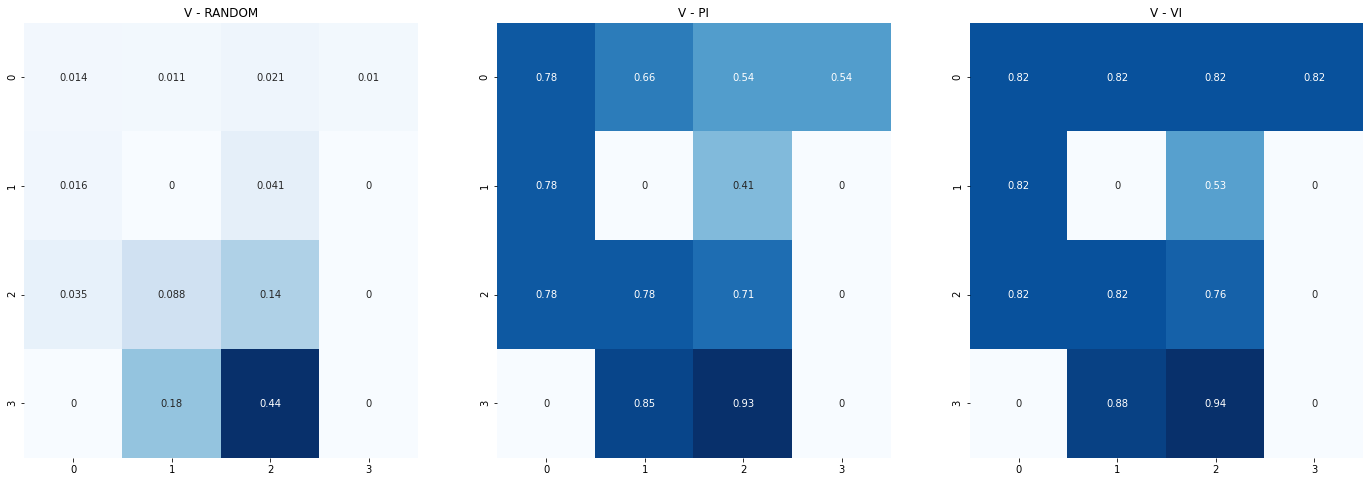

In [80]:
fig, ax = plt.subplots(1,3, figsize=(24, 8))
sns.heatmap(V_e.reshape(4, 4), cmap="Blues", annot=True, cbar=False, ax=ax[0])
ax[0].set_title('V - RANDOM')
sns.heatmap(V_pi.reshape(4, 4), cmap="Blues", annot=True, cbar=False, ax=ax[1])
ax[1].set_title('V - PI')
sns.heatmap(V_vi.reshape(4, 4), cmap="Blues", annot=True, cbar=False, ax=ax[2])
ax[2].set_title('V - VI')
plt.show

In [81]:
# Źródła:
# [1] Richard S. Sutton, Andrew G. Barto, "Reinforcement Learning: An Introduction", second edition, The MIT Press, Cambridge, Massachusetts, London, England, 2018, s. 80, s. 83
# [2] Udacity, Machine Learning Nanodegree, "Dynamic Programming Mini Project"